<a id='table_of_contents'></a>

# Table of Contents
0. [Import Libraries and Data](#imports) 
1. [Data Exploration](#data_exploration) 
3. [Movies vs TV Shows](#comparsion)
4. [Netfilx Analysis](#netflix)


<a id='imports'></a>
# Import Libraries and Data
[Back to top](#table_of_contents)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
netflix_df = pd.read_csv("data/netflix_titles.csv")

<a id='data_exploration'></a>
# Data Exploration
[Back to top](#table_of_contents)

In [3]:
netflix_df.shape

(8807, 12)

In [4]:
netflix_df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3547,s3548,Movie,Back to School,"Rémy Four, Julien War","Ludovik, Jérôme Niel, Nicolas Berno, Johann Di...",NaN,"August 30, 2019",2019,TV-MA,84 min,"Comedies, International Movies",Eager to flaunt their success in front of old ...
3939,s3940,Movie,Petta,Karthik Subbaraj,"Rajnikanth, Vijay Sethupathi, M. Sasikumar, Na...",India,"April 5, 2019",2019,TV-14,170 min,"Action & Adventure, Comedies, Dramas","An affable, newly appointed college warden pro..."
7066,s7067,Movie,Incorruptible,Elizabeth Chai Vasarhelyi,NaN,"United States, Senegal","September 1, 2017",2015,TV-MA,90 min,Documentaries,"In the streets of Senegal, a youth movement ri..."
3076,s3077,TV Show,The Bride of Habaek,NaN,"Shin Sae-kyeong, Nam Joo-hyuk, Lim Ju-hwan, Kr...",South Korea,"January 1, 2020",2017,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",When a quest for divine stones in the human wo...
1613,s1614,Movie,Effie Gray,Richard Laxton,"Dakota Fanning, Emma Thompson, Julie Walters, ...",United Kingdom,"December 1, 2020",2014,PG-13,109 min,"Dramas, International Movies, Romantic Movies","Trapped in a loveless marriage, the young wife..."


In [5]:
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
netflix_df= netflix_df.dropna(subset=['duration'])

In [7]:
netflix_df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [8]:
netflix_df.describe()

,release_year
count,8804.000000
mean,2014.180259
std,8.820647
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


<a id='comparsion'></a>
# Movies vs TV Shows
[Back to top](#table_of_contents)

In [9]:
def visual(x1,y1,x2,y2,p1,p2,movie_title,movie_tv_show):
    fig , ax = plt.subplots(1,2,figsize=(15,5))

    sns.barplot(x=x1,y=y1,ax=ax[0],palette=p1)
    ax[0].set_title(movie_title)
    sns.barplot(x=x2,y=y2,ax=ax[1],palette=p2)
    ax[1].set_title(movie_tv_show)

    plt.tight_layout()
    plt.show()

In [10]:
type_counts = netflix_df['type'].value_counts()
type_counts

Movie      6128
TV Show    2676
Name: type, dtype: int64

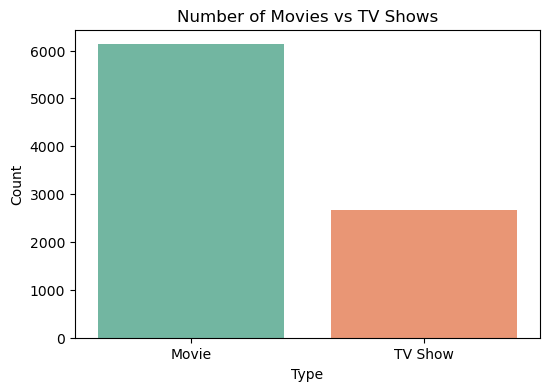

In [11]:
plt.figure(figsize=(6, 4))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='Set2')
plt.title('Number of Movies vs TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

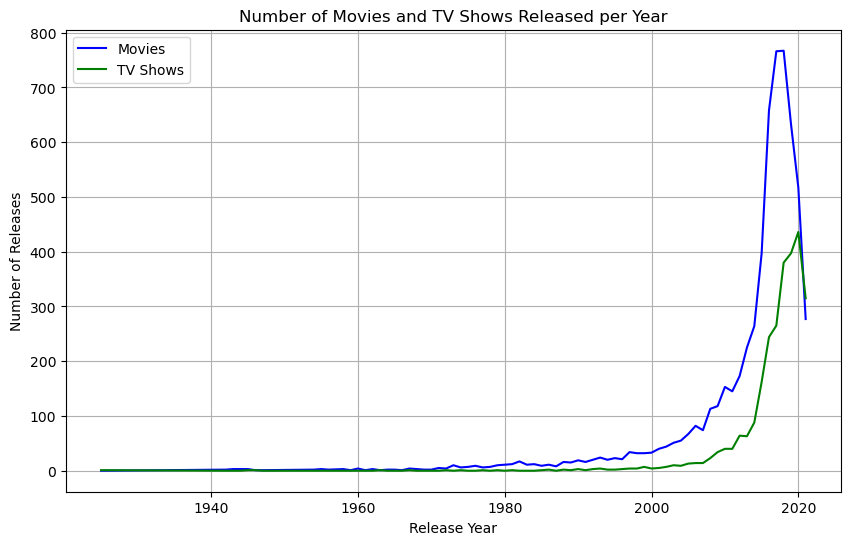

type,Movie,TV Show
release_year,,
1925,0,1
1942,2,0
1943,3,0
1944,3,0
1945,3,1
...,...,...
2017,766,265
2018,767,380
2019,633,397


In [26]:
content_counts = netflix_df.groupby(['release_year', 'type']).size().unstack(fill_value=0)
plt.figure(figsize=(10, 6))

plt.plot(content_counts.index, content_counts['Movie'], linestyle='-', color='blue', label='Movies')
plt.plot(content_counts.index, content_counts['TV Show'], linestyle='-', color='green', label='TV Shows')

plt.title('Number of Movies and TV Shows Released per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Releases')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
tv_shows = netflix_df[netflix_df["type"]=="TV Show"]
movies = netflix_df[netflix_df["type"]=="Movie"] 

In [14]:
movie_genres = movies['listed_in'].str.split(', ').explode().value_counts().head(10)
tv_show_genres = tv_shows['listed_in'].str.split(', ').explode().value_counts().head(10)

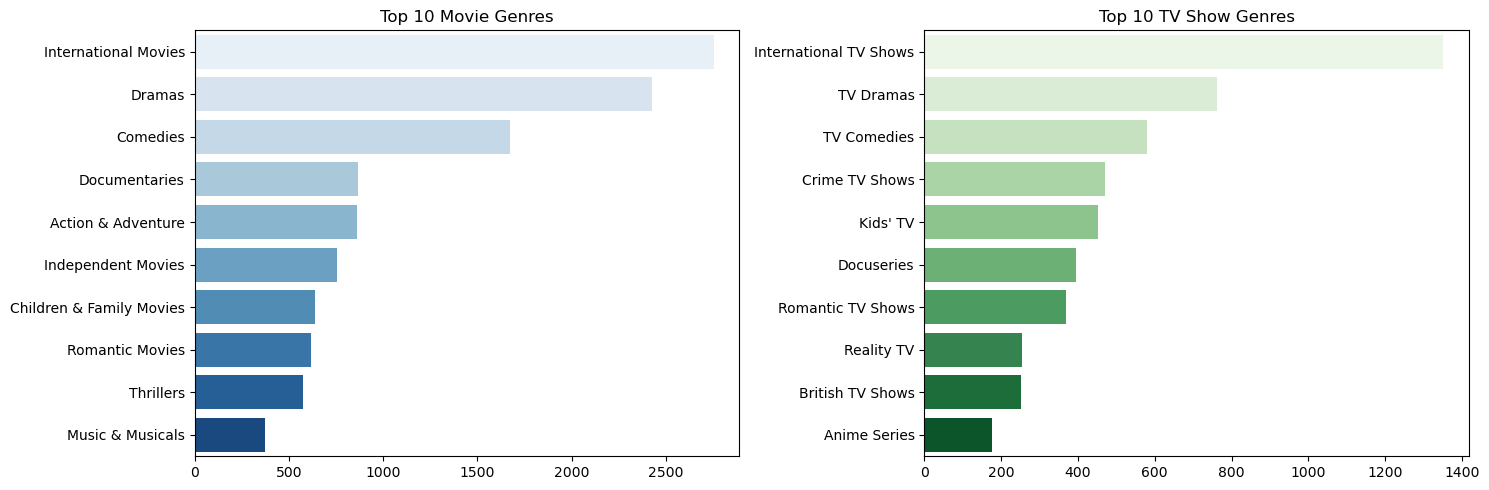

In [15]:
visual(movie_genres.values,movie_genres.index,tv_show_genres.values,tv_show_genres.index,
       'Blues','Greens','Top 10 Movie Genres','Top 10 TV Show Genres')

In [16]:
movie_countrys = movies['country'].str.split(', ').explode().value_counts().head(10)
tv_show_countrys = tv_shows['country'].str.split(', ').explode().value_counts().head(10)

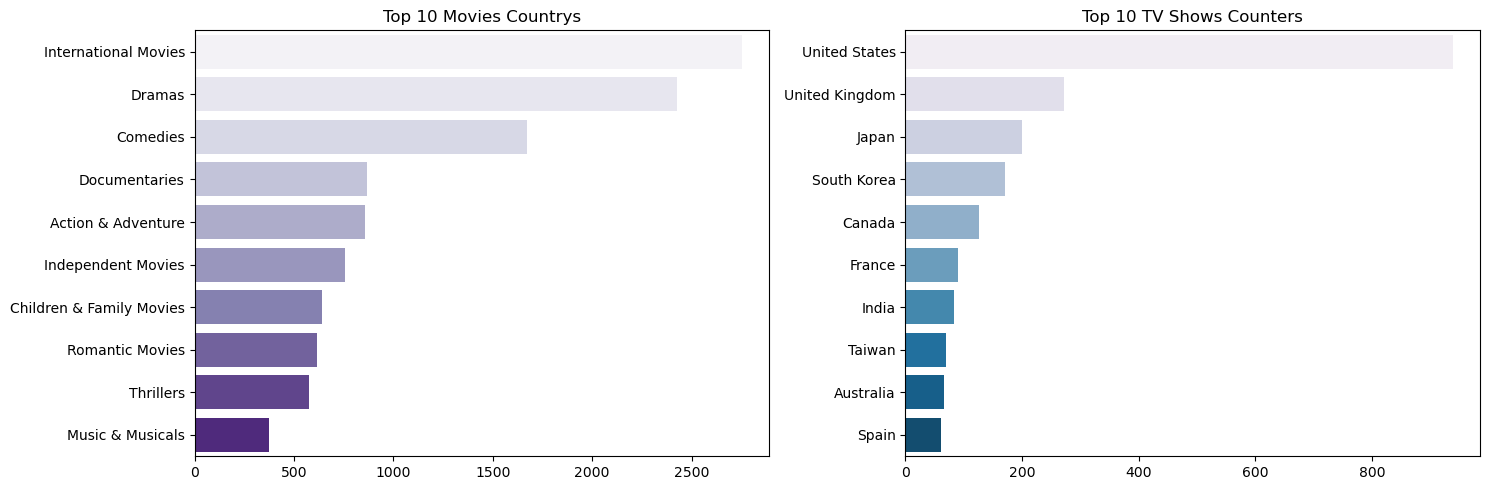

In [17]:
visual(movie_genres.values,movie_genres.index,tv_show_countrys.values,tv_show_countrys.index,
       'Purples','PuBu','Top 10 Movies Countrys','Top 10 TV Shows Counters')

In [18]:
movie_actors = movies['cast'].str.split(', ').explode().value_counts().head(5)
tv_show_actors = tv_shows['cast'].str.split(', ').explode().value_counts().head(5)

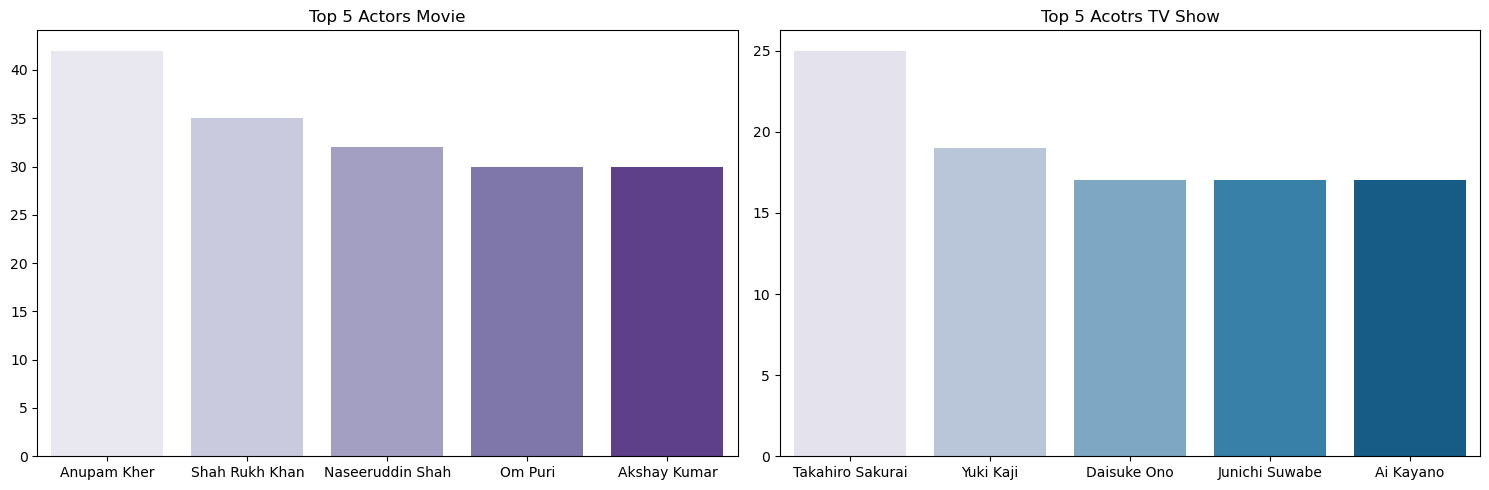

In [19]:
visual(movie_actors.index,movie_actors.values,tv_show_actors.index,tv_show_actors.values,
       'Purples','PuBu','Top 5 Actors Movie','Top 5 Acotrs TV Show')

<a id='netflix'></a>
# Netflix Analysis
[Back to top](#table_of_contents)

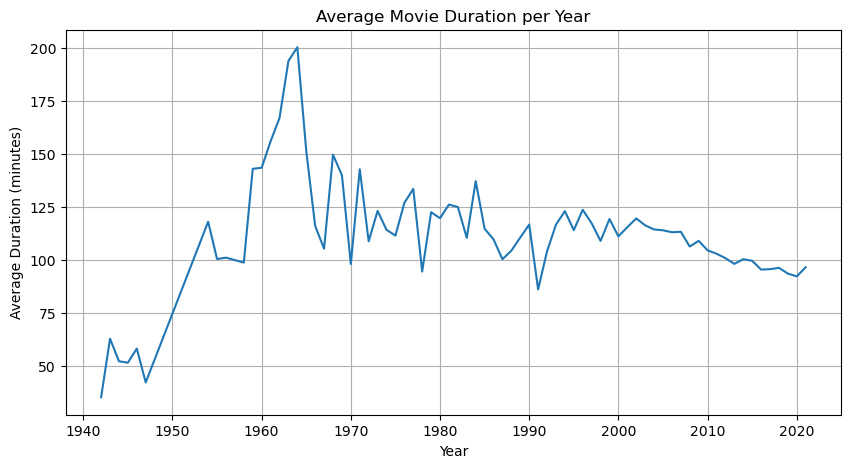

In [23]:
avg_duration_per_year = movies.groupby('release_year')['duration'].mean().sort_index()

plt.figure(figsize=(10, 5))
avg_duration_per_year.plot()
plt.title('Average Movie Duration per Year')
plt.xlabel('Year')
plt.ylabel('Average Duration (minutes)')
plt.grid(True)
plt.show()
